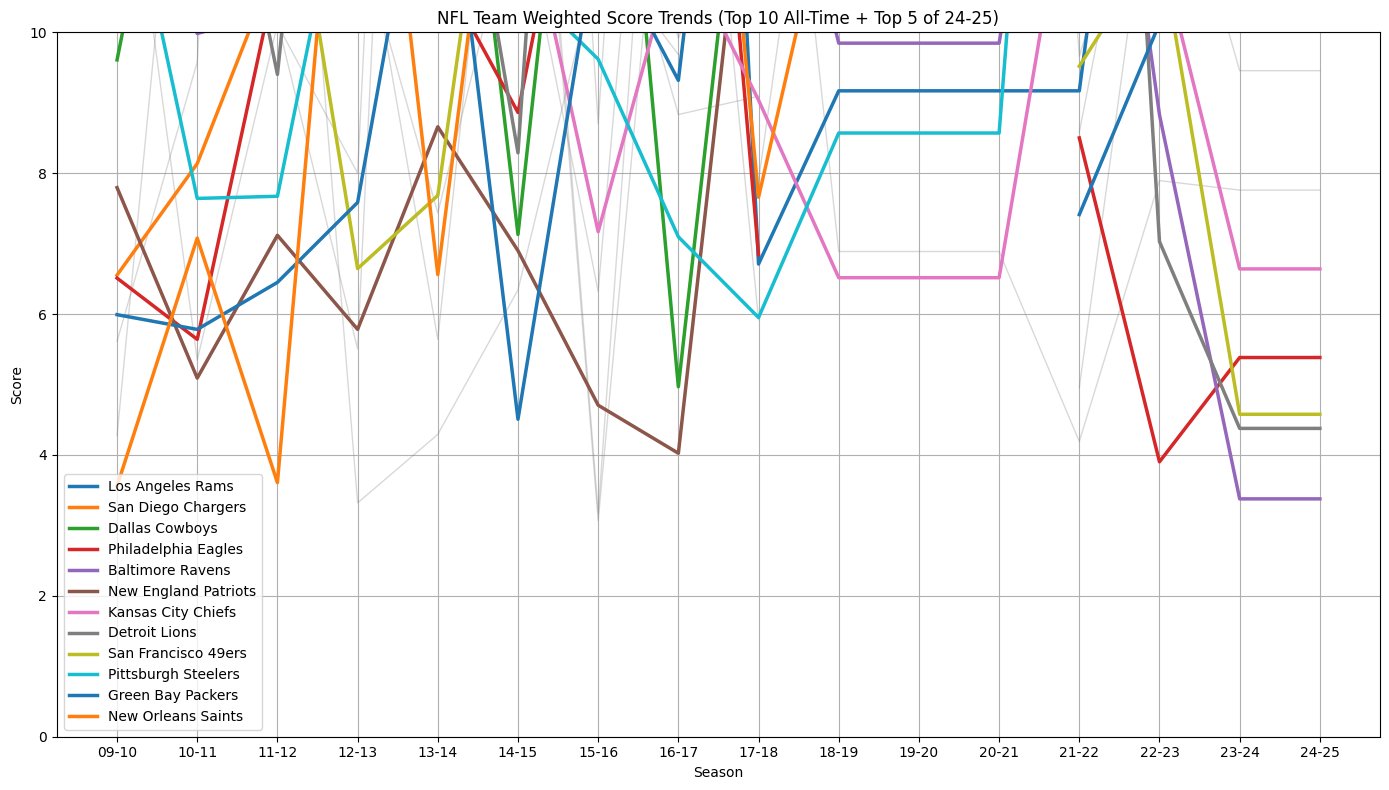

In [15]:
# 📦 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 2. Define Seasons and Weights
seasons = [
    '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16',
    '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23',
    '23-24', '24-25'
]
data_by_year = []

weights = {
    'PointDifferential(Rank)': 0.201375,
    'TurnoverMargin(Rank)': 0.150301,
    'YardsAllowedPerGame(Rank)': 0.118523,
    'TotalYardsPerGame(Rank)': 0.090575,
    'YardsPerAttempt(Rank)': 0.087150,
    '3rdDownEfficiency(Rank)': 0.085007,
    '4thDownEfficiency(Rank)': 0.072778,
    'FieldGoalPercentage(Rank)': 0.068099,
    'CompletionPercentage(Rank)': 0.064017,
    'YardsPerCarry(Rank)': 0.061366
}

# 🔄 3. Loop Through Each Year
for season in seasons:
    filename = f"{season}nflstats.csv"
    df = pd.read_csv(filename)

    stat_columns = df.columns[1:]  # all stats excluding team name
    df[stat_columns] = df[stat_columns].apply(pd.to_numeric, errors='coerce')

    df['Score'] = df[weights.keys()].apply(
        lambda row: sum(row[col] * weights[col] for col in weights), axis=1)

    df['Year'] = season
    data_by_year.append(df[['Team', 'Score', 'Year']])

# 📊 4. Combine All Seasons and Aggregate Duplicates
all_scores = pd.concat(data_by_year)
all_scores = all_scores.groupby(['Year', 'Team'], as_index=False)['Score'].mean()

# 🎯 5. Pivot
pivot = all_scores.pivot(index='Year', columns='Team', values='Score')

# ★ Highlight Teams: Top 10 All-Time + Top 5 in 24-25
team_means = pivot.mean().sort_values().head(10).index.tolist()
top_2024 = all_scores[all_scores['Year'] == '24-25'].sort_values('Score').head(5)['Team'].tolist()
highlight_teams = list(set(team_means + top_2024))

# Plot
plt.figure(figsize=(14, 8))
sns.set_palette("tab10")
for team in pivot.columns:
    plt.plot(pivot.index, pivot[team], color='gray', alpha=0.3, linewidth=1)
for i, team in enumerate(highlight_teams):
    if team in pivot.columns:
        plt.plot(pivot.index, pivot[team], label=team, linewidth=2.5)

plt.title('NFL Team Weighted Score Trends (Top 10 All-Time + Top 5 of 24-25)')
plt.xlabel('Season')
plt.ylabel('Score')
plt.ylim(0, 10)
plt.legend(loc='lower left')
plt.tight_layout()
plt.grid(True)
plt.show()
